НПМбв-02-20
Косинов Н.А.

## 1. Табличные данные и Pandas

In [4]:
%pylab inline
# import almost all we need
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Данные находятся в приложенном файле `chipotle.tsv`

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [5]:
table = pd.read_csv('chipotle.tsv',sep='\t')
last = table.tail(10)
print(last)

      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25   
4613                                                NaN     $2.15   
4614                                                NaN     $1.50   
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75   
4616                                                NaN     $4.45   
4617  [Fresh Tomato Salsa, [Rice, Black Beans,

Мы видим список заказов. Предположение:
* нулевая колонка - номер записи;
* первая колонка - номер покупателя;
* вторая колонка - количество купленного товара;
* третья колонка - наименование;
* четвёртая колонка - состав;
* пятая колонка - цена.

#### 2.  Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [6]:
print('В выборку попало',last['order_id'].nunique(),'заказов')
print('Было куплено',last['item_name'].nunique(),'категорий товаров')

В выборку попало 4 заказов
Было куплено 7 категорий товаров


#### 3. Есть ли в данных пропуски? В каких колонках?

In [7]:
columns = table.columns.tolist()
print('Все столбцы >> ')
print(columns)
nan = []
for c in columns:
  if table[c].isin([NaN]).any(): nan.append(c)
print('\nСтолбцы с пустотами >> ')
print(nan)

Все столбцы >> 
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

Столбцы с пустотами >> 
['choice_description']


Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

В предыдущем пункте мы увидели, что с пустотами только строковый столбец.

In [8]:
table = table.fillna(value='')
last = table.tail(10)
print(last)

      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25   
4613                                                        $2.15   
4614                                                        $1.50   
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75   
4616                                                        $4.45   
4617  [Fresh Tomato Salsa, [Rice, Black Beans,

#### 4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [9]:
print('Тип колонки цены >> ',table['item_price'].dtypes)
if 'price' not in table.columns:
  table = table.reindex(columns=list(table.columns)+['price'])

table.loc[:,'price'] = table.loc[:,'item_price'].apply(lambda x: float(x[1:]))
last = table.tail(10)
print(last)

Тип колонки цены >>  object
      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25    9.25  
4613                                                        $2.15    2.15  
4614                                                        $1.50    1.50  
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75    8.75  
4616                                                

Какая средняя/минимальная/максимальная цена у товара?

In [10]:
print('Без учёта quantity')
print('Самая высокая покупки =',table['price'].max())
print('Самая низкая  покупки =',table['price'].min())
print('Средняя цена  покупки = {:.2f}'.format(table['price'].mean()))
print('\nС учётом quantity')
print('Самая высокая  цена =',table[table['quantity']==1]['price'].max())
print('Самая низкая   цена =',table[table['quantity']==1]['price'].min())
print('Средняя цена товара = {:.2f}'.format(table[table['quantity']==1]['price'].mean()))

Без учёта quantity
Самая высокая покупки = 44.25
Самая низкая  покупки = 1.09
Средняя цена  покупки = 7.46

С учётом quantity
Самая высокая  цена = 11.89
Самая низкая   цена = 1.09
Средняя цена товара = 7.18


Удалите старую колонку с ценой.

In [11]:
columns = list(table.columns)
columns.remove('item_price')
table = table.reindex(columns=columns)
last = table.tail(10)
print(last)

      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description  price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...   9.25  
4613                                                      2.15  
4614                                                      1.50  
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]   8.75  
4616                                                      4.45  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...  11.75  
4618 

#### 5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [12]:
t1 = table.sort_values(by='price')[table['quantity']==1]
print('Самые дорогие товары:')
print(t1[['item_name','price']].drop_duplicates(subset='item_name',keep='last').tail(5)[::-1].to_string(index=False))
print('\nСамые дешёвые товары:')
print(t1[['item_name','price']].drop_duplicates(subset='item_name',keep='first').head(5).to_string(index=False))

Самые дорогие товары:
            item_name  price
     Steak Salad Bowl  11.89
  Carnitas Salad Bowl  11.89
  Barbacoa Salad Bowl  11.89
Barbacoa Crispy Tacos  11.75
     Carnitas Burrito  11.75

Самые дешёвые товары:
        item_name  price
    Bottled Water   1.09
      Canned Soda   1.09
Canned Soft Drink   1.25
    Side of Chips   1.69
            Chips   1.99


<ipython-input-12-7e1c7fa1a4f0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t1 = table.sort_values(by='price')[table['quantity']==1]


#### 6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [13]:
print('Chicken Bowl больше 1 порции покупали',
      table[(table['item_name']=='Chicken Bowl') & (table['quantity'] > 1)].shape[0],'раз')
print('Всего этот товар покупали',
      table[table['item_name']=='Chicken Bowl'].shape[0],'раз')


Chicken Bowl больше 1 порции покупали 33 раз
Всего этот товар покупали 726 раз


#### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [14]:
sumcheck = table.groupby('order_id')[['quantity','price']].sum()
print('Средний чек = ${:.2f}'.format(sumcheck['price'].mean()))
print('В среднем покупают {:.2f}'.format(sumcheck['quantity'].mean()),'товаров')

Средний чек = $18.81
В среднем покупают 2.71 товаров


#### 8. Сколько заказов содержали ровно 1 товар?

In [15]:
print('Ровно 1 товар содержали',sumcheck[(sumcheck['quantity']==1)].shape[0],'заказов')

Ровно 1 товар содержали 56 заказов


#### 9. Какая самая популярная категория товара?

In [16]:
popular = table.groupby('item_name')['quantity'].sum()
popular = popular.sort_values()
print('Самый популярный товар -',popular.tail(1).index[0])
print('Его покупали ',popular.max(),'раз.')

Самый популярный товар - Chicken Bowl
Его покупали  761 раз.


#### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой?

In [17]:
names = table['item_name'].unique()

bnames = []
for n in names:
  if 'Burrito' in n: bnames.append(n)

print('Существуют следующие виды Burrito:')
print(*bnames,sep='\n')
pop = popular[bnames].sort_values().tail(1).index[0]
print('\nЧаще всего покупают',pop)
print('Его купили',popular[pop],'раз.')

tp = table.sort_values(by='price')[(table['quantity']==1)&(table['item_name'].isin(bnames))]
top = tp[['item_name','price']].drop_duplicates(subset='item_name',keep='last').tail(1)['item_name'].to_string(index=False)
print('Самый дорогой -',top)
print('Он стоит $',tp['price'].max(),sep='')
print()

Существуют следующие виды Burrito:
Steak Burrito
Chicken Burrito
Barbacoa Burrito
Carnitas Burrito
Veggie Burrito
Burrito

Чаще всего покупают Chicken Burrito
Его купили 591 раз.
Самый дорогой - Carnitas Burrito
Он стоит $11.75



<ipython-input-17-45e13d05ad85>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tp = table.sort_values(by='price')[(table['quantity']==1)&(table['item_name'].isin(bnames))]


#### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [18]:
order = table.groupby('order_id')['price'].sum()
t1 = table.reindex(columns=list(table.columns)+['order','is_over_40proc'])
t1.loc[:,'order'] = t1.loc[:,'order_id'].apply(lambda x: order[x])
t1['is_over_40proc'] = t1.apply(lambda x: x['price']/x['order'], axis=1)
t1 = t1.groupby('order_id')[['is_over_40proc']].max()
print('Более 40% чека товар занимает в',
      t1[t1['is_over_40proc'] > 0.4].shape[0],'заказах')

Более 40% чека товар занимает в 1624 заказах


#### 12. Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [19]:
old_revenue = table['price'].sum()
print('Старая выручка = {:.2f}'.format(old_revenue))
print('Выручка от Diet Coke должна подняться на {:.2f}%'.format(1.35/1.25*100-100))
t1 = table.reindex(columns=['is_Diet'])
t1['is_Diet'] = table.apply(lambda x: x['price'] if ('Diet Coke' in x['choice_description'])and
                           (x['price']==x['quantity']*1.25) else 0,axis=1)
old_diet = t1['is_Diet'].sum()
print('Старая выручка от Diet Coke = {:.2f}'.format(old_diet))

new_table = table.copy()
new_table['price'] = table.apply(lambda x: x['quantity']*1.35 if ('Diet Coke' in x['choice_description']) and
                                (x['price']==x['quantity']*1.25) else x['price'],axis=1)
t1['is_Diet'] = new_table.apply(lambda x: x['price'] if ('Diet Coke' in x['choice_description']) and
                                (x['price']==x['quantity']*1.35)else 0,axis=1)
new_diet = t1['is_Diet'].sum()
new_revenue = new_table['price'].sum()

print('Новая выручка = {:.2f}'.format(new_revenue))
print('\nНовая выручка от Diet Coke = {:.2f}'.format(new_diet))
print('Выручка от Diet Coke поднялась на {:.2f}%'.format(new_diet/old_diet*100-100))
print('Общая выручка поднялась на {:.2f}%'.format(new_revenue/old_revenue*100-100))

table = new_table

Старая выручка = 34500.16
Выручка от Diet Coke должна подняться на 8.00%
Старая выручка от Diet Coke = 143.75
Новая выручка = 34511.66

Новая выручка от Diet Coke = 155.25
Выручка от Diet Coke поднялась на 8.00%
Общая выручка поднялась на 0.03%


#### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

Честно говоря, я не понял, о какой матрице здесь идёт речь

Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [20]:
# your code

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [21]:
%matplotlib inline
# нужно для отображения графиков внутри ноутбука
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [22]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=table.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(table.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
table['date'] = table.order_id.map(dates['date'])

In [23]:
print(table.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description', 'price',
       'date'],
      dtype='object')


#### 14. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name.

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

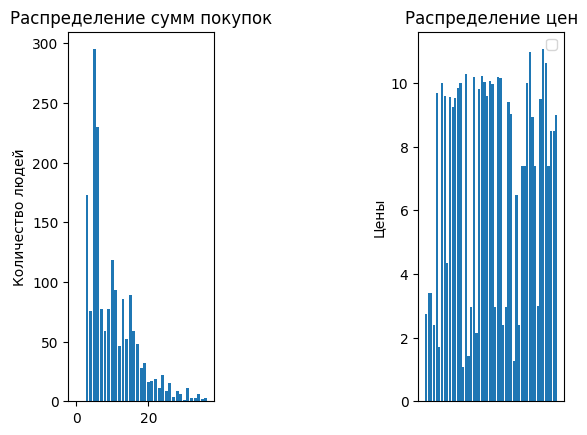

In [90]:
sp = plt.subplot(131)
x = np.arange(7,45)
purch = table.groupby('order_id')['price'].sum()
bars = [len(purch[np.bitwise_and(purch >= x[i], purch < x[i+1])]) for i in range(len(x)-1)]
plt.bar(range(len(x)-1),bars)
plt.ylabel(r'Количество людей', fontsize=10)
plt.title(r'Распределение сумм покупок')

sp = plt.subplot(133)
items = table['item_name'][table['quantity']==1].drop_duplicates()
prices = items.apply(lambda x: table[(table['item_name']==x)&(table['quantity']==1)]['price'].mean()).to_numpy()
#data = prices.poisson(10,20)
plt.bar(items,prices)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel(r'Цены', fontsize=10)
plt.legend(loc='best', fontsize=10)
plt.title(r'Распределение цен')
plt.show()

#### 15. Постройте график зависимости суммы покупок от дней.

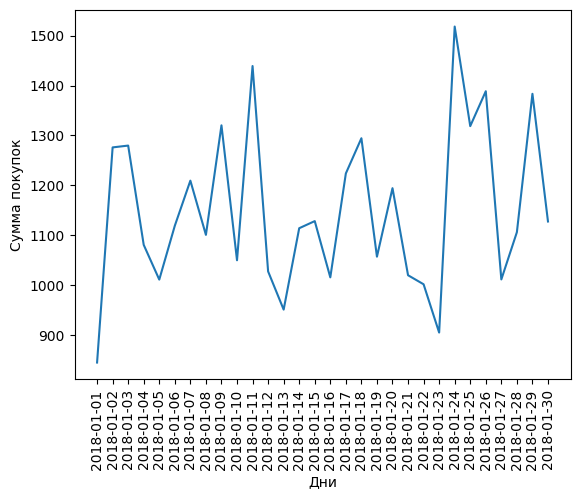

In [59]:
s = table.groupby('date')['price'].sum()
plt.ylabel(r'Сумма покупок', fontsize=10)
plt.xlabel(r'Дни', fontsize=10)
plt.xticks(rotation=90)
plt.plot(s)


#### 16. Постройте средних сумм покупок по дням недели (bar plot).

Text(0.5, 1.0, 'Среднее количество покупок')

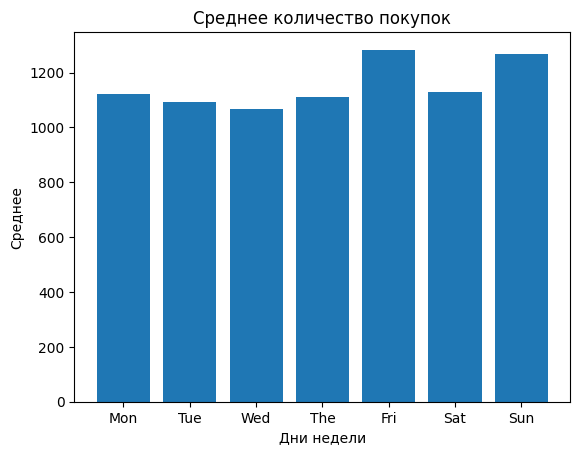

In [82]:
table['week'] = table.date.map(s)
Week = ['Mon','Tue','Wed','The','Fri','Sat','Sun']
table.loc[:,'week'] = table.loc[:,'date'].apply(lambda x: Week[int(x[-2:])%7-1])
purch = table.groupby(['week','date'])['price'].sum()
bars = purch.groupby('week').mean()
plt.bar(Week,bars)
plt.xlabel(r'Дни недели', fontsize=10)
plt.ylabel(r'Среднее', fontsize=10)
plt.title(r'Среднее количество покупок')

#### 17. Постройте график зависимости денег за товар от купленного количества (scatter plot).

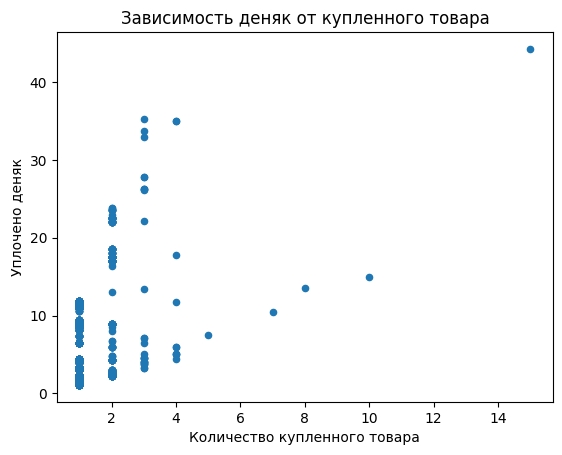

In [95]:
table.plot.scatter(x='quantity',y='price',
                   xlabel=r'Количество купленного товара',
                   ylabel=r'Уплочено деняк',
                   title=r'Зависимость деняк от купленного товара')


#### 18. Сохраните график в формате pdf (так он останется векторизованным).

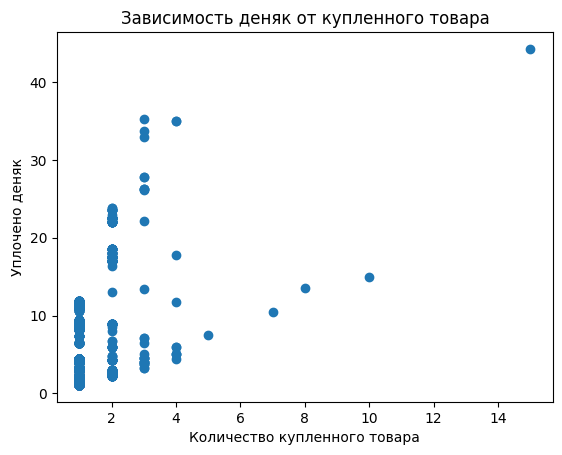

In [103]:
plt.scatter(x=table['quantity'],y=table['price'])
plt.xlabel(r'Количество купленного товара')
plt.ylabel(r'Уплочено деняк')
plt.title(r'Зависимость деняк от купленного товара')
plt.savefig('gr.pdf')
plt.show()

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.